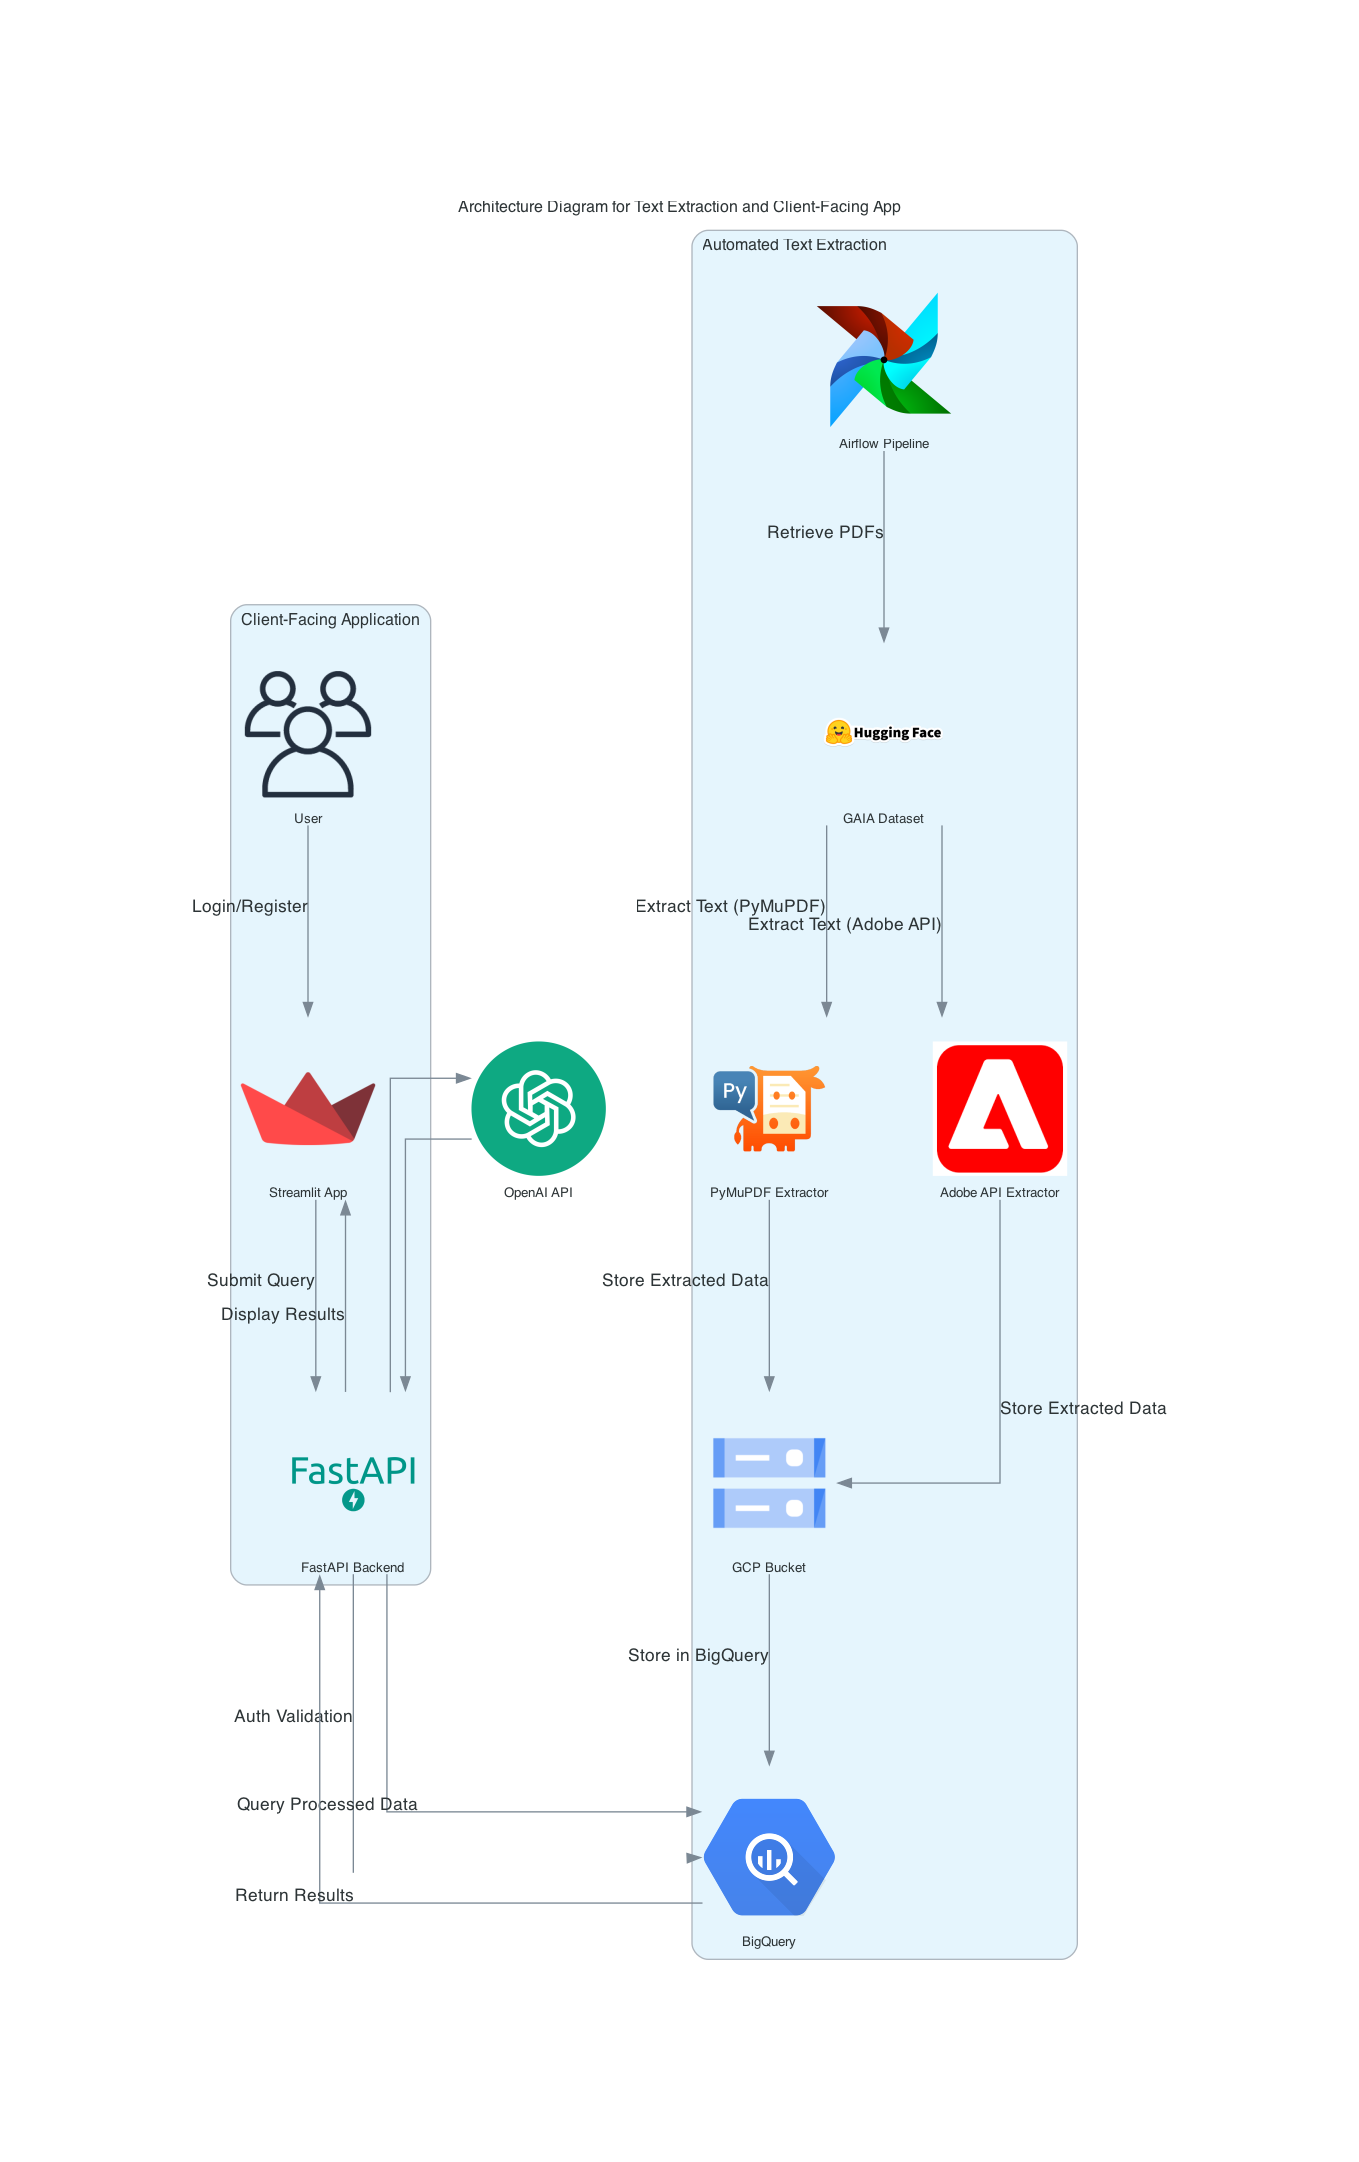

In [23]:
from diagrams import Diagram, Cluster, Edge
from diagrams.custom import Custom
from diagrams.gcp.storage import GCS
from diagrams.gcp.database import SQL
from diagrams.onprem.client import Users

# Define the paths to the custom icons
streamlit_logo = "streamlit_logo.png"  
fastapi_logo = "fastapi_logo.png"        
airflow_logo = "airflow_logo.png"        
adobe_logo = "adobe_logo.png"           
pymupdf_logo = "pymupdf_logo.png"        
huggingface_logo = "huggingface_logo.png" 
bigquery_logo = "bigquery_logo.png"       
openai_logo = "openai_logo.png"  # Add the correct path to the OpenAI logo

# Diagram graph attributes
graph_attr = {
    "fontsize": "12",
    "labelloc": "t",
    "label": "Architecture Diagram for Text Extraction and Client-Facing App",
    "ranksep": "2.0",  # Increased for better spacing
    "nodesep": "1.0",  # Adjusted for better spacing
}

node_attr = {
    "fontsize": "10"  # Adjusted font size for individual nodes
}

with Diagram("architecture_diagram", show=False, graph_attr=graph_attr, node_attr=node_attr, direction="TB") as diag:
    
    # User Interaction Cluster
    with Cluster("Client-Facing Application"):
        user = Users("User")
        streamlit_ui = Custom("Streamlit App", streamlit_logo)
        fastapi = Custom("FastAPI Backend", fastapi_logo)

    # Automated Text Extraction Cluster
    with Cluster("Automated Text Extraction"):
        airflow = Custom("Airflow Pipeline", airflow_logo)
        huggingface = Custom("GAIA Dataset", huggingface_logo)
        text_extraction_pymupdf = Custom("PyMuPDF Extractor", pymupdf_logo)  # Open Source option
        text_extraction_adobe = Custom("Adobe API Extractor", adobe_logo)  # API option
        storage = GCS("GCP Bucket")
        bigquery = Custom("BigQuery", bigquery_logo)

    # OpenAI API
    openai = Custom("OpenAI API", openai_logo)

    # User Interaction
    user >> Edge(xlabel="Login/Register") >> streamlit_ui
    streamlit_ui >> Edge(xlabel="Submit Query") >> fastapi
    fastapi >> Edge(xlabel="Auth Validation") >> bigquery

    # Airflow Pipeline for Data Processing
    airflow >> Edge(xlabel="Retrieve PDFs") >> huggingface
    huggingface >> Edge(xlabel="Extract Text (PyMuPDF)") >> text_extraction_pymupdf
    huggingface >> Edge(xlabel="Extract Text (Adobe API)") >> text_extraction_adobe
    text_extraction_pymupdf >> Edge(xlabel="Store Extracted Data") >> storage
    text_extraction_adobe >> Edge(xlabel="Store Extracted Data") >> storage
    storage >> Edge(xlabel="Store in BigQuery") >> bigquery

    # FastAPI Queries Processed Data
    fastapi >> Edge(xlabel="Query Processed Data") >> bigquery
    bigquery >> Edge(xlabel="Return Results") >> fastapi
    fastapi >> Edge(xlabel="Display Results") >> streamlit_ui

    # Sending Questions to OpenAI in the Backend
    fastapi >> Edge(xlabel="") >> openai
    openai >> Edge(xlabel="") >> fastapi

diag
